#### 크롤링시 유의점
robots. txt : 접근 제약 규칙 준수

crawl delay : 사이트에 최대한 부담 지원

term of use : 사이트 이용방침 준수

public content : 지적재산권 침해 여부 주의

authentication-based sites : 민감한 정보 수집 주의

# urllib

- urllib.request : Opening and reading URLs

- urllib.error : Containg the exceptions raised by urllib.request

- urllib.parse : Parsing URLs

- urllib.robotparse : Parsing robots.txt files

- urllib.response : Used internally by the urllib.request module

robots.txt 가져오기 모든 웹사이트에 있다.

In [1]:
from urllib import request

from urllib import robotparser

robot = robotparser.RobotFileParser()


robot.set_url("https://news.naver.com/robots.txt")

robot.read()

robot.can_fetch("Yeti","/main/imagemontage")

True

`urlopen` : Open the URL url, which can be either a string or a Request object Returns a http.client.HTTPResponse objects slightly modified

`geturl` : return the URL of the resource retrieved

`info` : return the meta-infomration of the page

`getcode` : return the HTTP status code of the response

In [3]:
from urllib import request

resp = request.urlopen("https://www.google.com")
resp.geturl()
resp.reason
resp.getcode() 
print(resp.info())

resp.getheaders()

Date: Thu, 11 Jul 2019 09:45:42 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=ISO-8859-1
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2019-07-11-09; expires=Sat, 10-Aug-2019 09:45:42 GMT; path=/; domain=.google.com
Set-Cookie: NID=187=kEuVJWXjwNU0ae7juD7uyUBosRcTqCHuUa7IqrU09QzLrAN1V_ScgFTktOSA0lac_onNy0kAEFgiqXfkyjGirFB6jkevJDKB0SBb-Qe9QitbO9jX2FKSDfKNHpoBMuXlftcXwd-AGDPJWzFiqqkR9SU0oSjEfztFGyekEq_CfC4; expires=Fri, 10-Jan-2020 09:45:42 GMT; path=/; domain=.google.com; HttpOnly
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




[('Date', 'Thu, 11 Jul 2019 09:45:42 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-07-11-09; expires=Sat, 10-Aug-2019 09:45:42 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'NID=187=kEuVJWXjwNU0ae7juD7uyUBosRcTqCHuUa7IqrU09QzLrAN1V_ScgFTktOSA0lac_onNy0kAEFgiqXfkyjGirFB6jkevJDKB0SBb-Qe9QitbO9jX2FKSDfKNHpoBMuXlftcXwd-AGDPJWzFiqqkR9SU0oSjEfztFGyekEq_CfC4; expires=Fri, 10-Jan-2020 09:45:42 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'quic=":443"; ma=2592000; v="46,43,39"'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

In [4]:
print(resp.status)

200


In [5]:
print(resp.reason)

OK


In [6]:
print(resp.info())

Date: Thu, 11 Jul 2019 09:45:42 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=ISO-8859-1
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2019-07-11-09; expires=Sat, 10-Aug-2019 09:45:42 GMT; path=/; domain=.google.com
Set-Cookie: NID=187=kEuVJWXjwNU0ae7juD7uyUBosRcTqCHuUa7IqrU09QzLrAN1V_ScgFTktOSA0lac_onNy0kAEFgiqXfkyjGirFB6jkevJDKB0SBb-Qe9QitbO9jX2FKSDfKNHpoBMuXlftcXwd-AGDPJWzFiqqkR9SU0oSjEfztFGyekEq_CfC4; expires=Fri, 10-Jan-2020 09:45:42 GMT; path=/; domain=.google.com; HttpOnly
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




In [7]:
resp = request.urlopen("https://www.google.com/search?source=hp&ei=v5smXYHNGsaR8wW2zqWwCA&q=%EB%B0%95%EB%B3%B4%EC%98%81")
resp.code, resp.reason 

##403 forbidden : 접근권한이 없어서 뱉는 에러 혹은 요청을 잘못할떄 뜨는 에러
# 에러가 당연한것, 구글에서 막아놨숨! 즉. 권한이 없음!

HTTPError: HTTP Error 403: Forbidden

#### status 200 : 정상
#### status 400 : client error 
#### status 500 : server error

In [10]:
header = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
from urllib import error
try:
    req = request.Request("https://www.google.com/search?source=hp&ei=v5smXYHNGsaR8wW2zqWwCA&q=%EB%B0%95%EB%B3%B4%EC%98%81",headers = header)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reaeson, e.headers)
    
##정상적으로 받아온결과가 resp에 들어있을것.

In [11]:
resp.code, resp.reason

(200, 'OK')

In [12]:
req.headers

{'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

In [13]:
from urllib import parse

In [14]:
parse.urlparse("https://www.google.com/search?q=%EB%B0%95+%EB%B3%B4+%EC%98%81&rlz=1C1NHXL_koKR768KR768")
parse.urljoin("https://www.google.com/search?q=%EB%B0%95+%EB%B3%B4+%EC%98%81&rlz=1C1NHXL_koKR768KR768",'/serach/about')
parse.urlencode({'q':'파이썬'})
parse.quote_plus('파이썬')
parse.unquote_plus("%EB%B0%95+%EB%B3%B4+%EC%98%81&rlz=1C1NHXL_koKR768KR768")

'박 보 영&rlz=1C1NHXL_koKR768KR768'

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>\xeb\xb0\x95\xeb\xb3\xb4\xec\x98\x81 - Google \xea\xb2\x80\xec\x83\x89</title><script nonce="5Ff21m5G3vgw6RnQDoNFbA==">(function(){window.google={kEI:\'pgUnXayEBKO2mAXomKiABA\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_pgUnXayEBKO2mAXomKiABA\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=goo
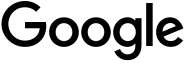
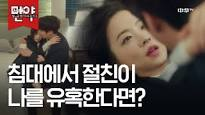
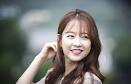
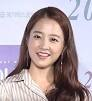
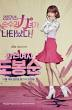
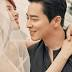

In [15]:
resp.read()

## Request 패키지

In [16]:
import requests

In [17]:
reap = requests.request("get", "http://httpbin.org/get")

In [18]:
print(reap.text)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.18.4"
  }, 
  "origin": "163.152.3.133, 163.152.3.133", 
  "url": "https://httpbin.org/get"
}



### download 함수

In [28]:
import requests
import time

def download(method ,url, param=None, data=None,timeout=1, maxetries=3): ##없을수도 있는 것에 None
    try : 
        resp = requests.request(method, url, params=param, data=data,
                       headers=header)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code <600 and maxetries>0:
            print(maxetries)
            time.sleep(timeout)
            print("재시도")
            download(method,url,param,data,timeout,maxetries-1)
        else :
            print(e.response.status_code)
            print(e.response.reason)
    return resp

##반복을 할때, 필요한게, 재시도를 할지, 얼만큼 기다릴지.

### api 가져오기

In [30]:
import json
params = {
    "serviceKey" : "X83SzHZu2hN3oX5qNXX%2Fj1HMKIxz46x9gZC%2BULtBTZw83s53dP68PymkE%2FLNjukp0npKAMhb5CAIg%2BLlW8WedA%3D%3D",
    "numOfRows":10,
    "pageNo":1,
    "sidoName":"서울",
    "dataTerm":"DAILY",
    "ver":1.3,
    "_returnType":"json"
 }

params["serviceKey"] = requests.compat.unquote(params["serviceKey"]) 
#params["serviceKey"] = urllib.parse.unquote(params["serviceKey"]) 
#params = urllib.parse.urlencode(params)
##quote로 byte타입을 날리는데, 에러가 떳다는 것
## 이 친구가 byte인지 모르고 str로 날려줘서 그런 것!

url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"

html = download("get",url,param=params)
html.url

print(html.text)

obj = json.loads(html.text)

{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2019-07-11 18:00","khaiGrade":"1","khaiValue":"40","mangName":"도시대기","no2Grade":"1","no2Value":"0.014","numOfRows":"10","o3Grade":"1","o3Value":"0.024","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"6","pm10Value24":"5","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"3","pm25Value24":"3","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.002","stationCode":"","stationName":"중구","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.4","dataTerm":"","dataTime":"2019-07-11 18:00","khaiGrade":"1","khaiValue":"37","mangName":"도로변대기","no2Grade":"1","no2Value":"0.022","numOfRows":"10","o3Grade":"1","o3Value":"0.015","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"16","pm10Value24":"13","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"7","pm25Value24":"5","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoNam

In [35]:
resp = requests.request('get', url, params=params)

In [36]:
print(resp)

<Response [200]>


In [37]:
print(obj)

{'list': [{'_returnType': 'json', 'coGrade': '1', 'coValue': '0.3', 'dataTerm': '', 'dataTime': '2019-07-11 18:00', 'khaiGrade': '1', 'khaiValue': '40', 'mangName': '도시대기', 'no2Grade': '1', 'no2Value': '0.014', 'numOfRows': '10', 'o3Grade': '1', 'o3Value': '0.024', 'pageNo': '1', 'pm10Grade': '1', 'pm10Grade1h': '1', 'pm10Value': '6', 'pm10Value24': '5', 'pm25Grade': '1', 'pm25Grade1h': '1', 'pm25Value': '3', 'pm25Value24': '3', 'resultCode': '', 'resultMsg': '', 'rnum': 0, 'serviceKey': '', 'sidoName': '', 'so2Grade': '1', 'so2Value': '0.002', 'stationCode': '', 'stationName': '중구', 'totalCount': '', 'ver': ''}, {'_returnType': 'json', 'coGrade': '1', 'coValue': '0.4', 'dataTerm': '', 'dataTime': '2019-07-11 18:00', 'khaiGrade': '1', 'khaiValue': '37', 'mangName': '도로변대기', 'no2Grade': '1', 'no2Value': '0.022', 'numOfRows': '10', 'o3Grade': '1', 'o3Value': '0.015', 'pageNo': '1', 'pm10Grade': '1', 'pm10Grade1h': '1', 'pm10Value': '16', 'pm10Value24': '13', 'pm25Grade': '1', 'pm25Grade1

get이 아닌 post,

post는 주로 데이터를 생성하거나 숨기거나 전달할때 쓴거나 로그인, 회원가입에 쓴다

In [38]:
from html import unescape

In [40]:
html.encoding = "utf-8"
html.text
unescape(html.text)

'{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2019-07-11 18:00","khaiGrade":"1","khaiValue":"40","mangName":"도시대기","no2Grade":"1","no2Value":"0.014","numOfRows":"10","o3Grade":"1","o3Value":"0.024","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"6","pm10Value24":"5","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"3","pm25Value24":"3","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.002","stationCode":"","stationName":"중구","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.4","dataTerm":"","dataTime":"2019-07-11 18:00","khaiGrade":"1","khaiValue":"37","mangName":"도로변대기","no2Grade":"1","no2Value":"0.022","numOfRows":"10","o3Grade":"1","o3Value":"0.015","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"16","pm10Value24":"13","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"7","pm25Value24":"5","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoNa

`unescape` : Convert all named and numeric character references (e.g. &gt;, &#62;,
&x3e;) in the string s to the corresponding unicode characters.
This function uses the rules defined by the HTML 5 standard
for both valid and invalid character references, and the list of
HTML 5 named character references defined in html.entities.html5.

In [42]:
with open("test.html", "w") as f:
    f.write(html.text)

### 교보문고 불러오기
#### 한글은 안된다 영어는 된다!

In [53]:
url = "http://www.kyobobook.co.kr/search/SearchCommonMain.jsp"

In [54]:
params = {'vPstrKeyWord':"&#48149&#48372;&#50689;"} ##post할떄 개발자도구 열어서 form data 의 params를 가져오자
html = download("post",url,param=params)
print(html.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
















<!-- header -->
 



























<head>
	<title>&#48149&#48372;&#50689; -  인터넷교보문고</title>
<META http-equiv="Pragma" content="nocache">
<meta http-equiv="Expires" content="0"/>
<META http-equiv="Cache-Control" content="no-cache">
<META http-equiv='Content-Type' content='text/html; charset=euc-kr'>
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">
<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->
<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>
<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />
<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />
<!--
<link rel="stylesheet" type="text/css" href="/css/common.css"/>
<link rel="stylesheet" type="text/css"

In [55]:
unescape(html.text)

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>박보영 -  인터넷교보문고</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />\n<!--\n<link rel="stylesheet

In [ ]:
with open("교보문고3.html", "w") as f:
    f.write(html.text) 

#### coockie & session

로그인 했을경우 - 개발자도구 - application - coockies

이번에도 post를 이용한다.

In [43]:
request.urlparse("http://pythonscraping.com/pages/cookies/login.html?id=1234")

ParseResult(scheme='http', netloc='pythonscraping.com', path='/pages/cookies/login.html', params='', query='id=1234', fragment='')

In [44]:
requests.compat.urljoin("http://pythonscraping.com/pages/cookies/login.html?id=1234", "process.php")

'http://pythonscraping.com/pages/cookies/process.php'

#### scarping site 에 로그인!

In [45]:
url = "http://pythonscraping.com/pages/cookies/login.html?id=1234"
url = requests.compat.urljoin(url, "welcome.php")
data = {
    "username":"plzhelpme",
    "password":"password"
}
html = download("post", url, data=data)
html.text

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

In [46]:
session = requests.Session()

In [47]:
session.post

<bound method Session.post of <requests.sessions.Session object at 0x00000271B2D9DBE0>>

In [48]:
html = session.post(url, data)
html.text ## 여기서 쿠키가 생성되지만 미처 반영은 안됨!

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

In [50]:
html = session.post(url)
html.text ##쿠키값이 살아있으니까 이때는 로그인 성공!!!!

'\n<h2>Welcome to the Website!</h2>\nYou have logged in successfully! <br><a href="profile.php">Check out your profile!</a>'

In [51]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='loggedin', value='1', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='username', value='plzhelpme', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False)]>

#### 빅데이터 청년인재 lms 로그인하기

In [52]:
url = "https://lms.sunde41.net/auth/login"
#url = requests.compat.urljoin(url, "dashboard")
data = {
    "email":"brackdog1@naver.com",
    "password":"wogns!35"
}
html = download("post", url, data=data)
html.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <title>대시보드 :\n        빅데이터 청년인재 고려대학교 과정 학습관리시스템</title>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no">\n    <meta name="robots" content="noindex,nofollow">\n    <link href="/static/vendors/bootstrap.css?v=1.1" rel="stylesheet">\n    <link href="/static/vendors/main.css?v=1.1" rel="stylesheet">\n    <link href="/static/vendors/icon.css?v=1.0" rel="stylesheet">\n    <link href="/static/vendors/preloaders.css?v=1.0" rel="stylesheet">    <link href="/static/vendors/fullcalendar.css?v=1.0" rel="stylesheet">\n    <link href="/static/vendors/style.css?v=1.8" rel="stylesheet">\n    <link rel="icon" href="/static/favicon/cropped-m_logo-32x32.png" sizes="32x32">\n    <link rel="icon" href="/static/favicon/cropped-m_logo-192x192.png" sizes="192x192">\n    <link rel="apple-touch-icon-precompos